In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
# Delete unnamed column
data.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [15]:
# Renaming YearsExperience to Experience_In_Years
data.rename(columns={'YearsExperience':'Experience_In_Years'},inplace=True)

In [19]:
# checking for null values
data.isnull().sum()

Experience_In_Years    0
Salary                 0
dtype: int64

In [20]:
# There are no null values in the dataset.

In [21]:
# Checking for categorical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Experience_In_Years  30 non-null     float64
 1   Salary               30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [22]:
# There are no categorical variables.

Text(0.5, 1.0, 'Relation between Experience and Salary')

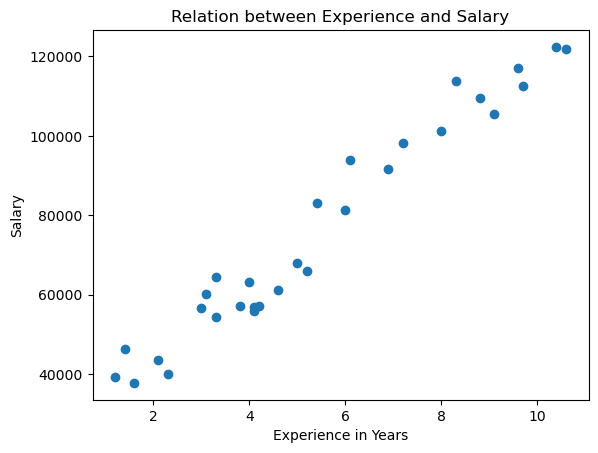

In [23]:
# Check the data distribution
plt.scatter(data['Experience_In_Years'],data['Salary'])
plt.xlabel('Experience in Years')
plt.ylabel("Salary")
plt.title("Relation between Experience and Salary")

In [24]:
# The above graph tells us that both variables are in positive linear relationship.
# The dependent variable (Salary) is labelled.
# The Salary variable is continuous numerical data.

# Hence, we can apply Linear Regression Algorithm

In [28]:
# Split the data into Dependent and Independent Varibles.
x = data.iloc[:,0:1]
y = data.iloc[:,-1]

In [34]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)

In [35]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(22, 1) (8, 1) (22,) (8,)


In [36]:
# Buling the model

from sklearn.linear_model import LinearRegression


In [38]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [39]:
# Fetch Slope/Coefficient and Intercept values
coefficient = linear.coef_
Intercept = linear.intercept_

In [40]:
print(coefficient,Intercept)

[9687.07311447] 22856.33843669563


In [41]:
# Predicting the values

In [42]:
salary_pred = linear.predict(x_test)

In [43]:
salary_pred

array([ 71291.70400903, 123601.89882716, 115852.24033558,  61604.63089457,
       108102.58184401,  34480.82617406,  54823.67971444,  52886.26509154])

Text(0.5, 1.0, 'Best fit line for the relation between Experience and Salary')

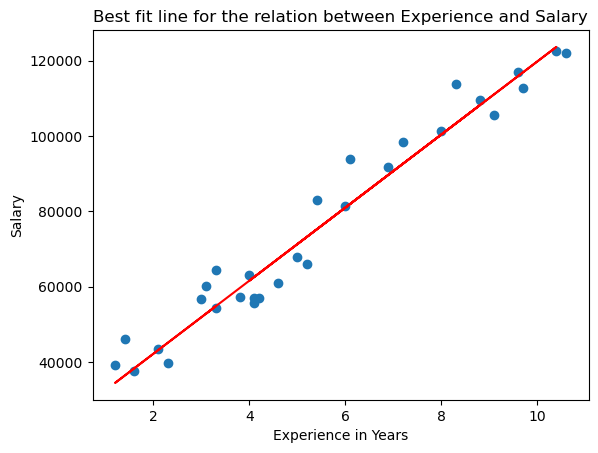

In [44]:
plt.scatter(data['Experience_In_Years'],data['Salary'])
plt.plot(x_test,salary_pred,color='red')
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.title("Best fit line for the relation between Experience and Salary")

In [45]:
# Evaluating

In [49]:
from sklearn.metrics import r2_score

In [51]:
accuracy = r2_score(y_test,salary_pred)
accuracy

0.9722211602409098

In [ ]:
# The accuracy of the model is 97.2%